In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

haberman = pd.read_csv("haberman.csv")
print(haberman.head(5))


   age  year  nodes  status
0   30    64      1       1
1   30    62      3       1
2   30    65      0       1
3   31    59      2       1
4   31    65      4       1


In [2]:
#to describe all the features of the data set
haberman.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [3]:
print(haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [4]:
# no of datapoints or to represent the shape of the data

print(haberman.shape)

(306, 4)


In [5]:
# to Count total no of survivals and dead  people

haberman.status.value_counts()

1    225
2     81
Name: status, dtype: int64

In [6]:
#hence the above function tells that total 225 people are survivred 5 years or more than 5 years
# and total 81 people died less tha 5 years or in 5 years

In [7]:
# converting the value 1 as survived in the status column
# and  2 as the died to tell they have died with in 5 years

haberman.status[haberman.status ==1]="survived"
haberman.status[haberman.status ==2]="dead"
print(haberman.head(20))

    age  year  nodes    status
0    30    64      1  survived
1    30    62      3  survived
2    30    65      0  survived
3    31    59      2  survived
4    31    65      4  survived
5    33    58     10  survived
6    33    60      0  survived
7    34    59      0      dead
8    34    66      9      dead
9    34    58     30  survived
10   34    60      1  survived
11   34    61     10  survived
12   34    67      7  survived
13   34    60      0  survived
14   35    64     13  survived
15   35    63      0  survived
16   36    60      1  survived
17   36    69      0  survived
18   37    60      0  survived
19   37    63      0  survived


In [8]:
# As the no of survival status=yes  and no of survival status=no are not equal 
# it is imbalenced dataset so haberman dataset is a imbalenced data

# description and objective of the dataset

# BI-VARIATE ANALYSIS ::  2D-SCATTERPLOTS

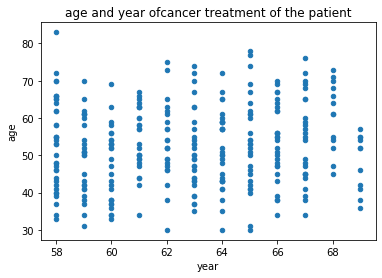

In [9]:
# (scatter plots, pair-plots, counter density plots) to see if combinat
#ions of features are useful in classfication.
#----------------------------------------------------------------------
#--------------------------------------------------------
# 2d scatter plot
haberman.plot(kind='scatter', x='year', y='age',title='age and year ofcancer treatment of the patient');
plt.show()
# we can't make sence out of it we have to use the seaborn to color the paients which are died or which are not died. (use the hue)


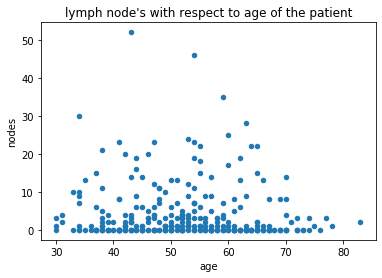

In [10]:
haberman.plot(kind='scatter', x='age', y='nodes',title="lymph node's with respect to age of the patient" );
plt.show()

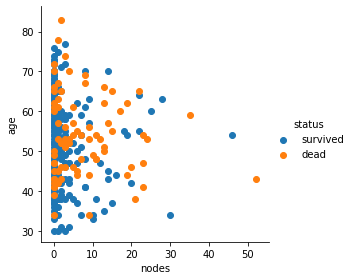

In [11]:
sns.FacetGrid(haberman,hue='status',height=4)\
 .map(plt.scatter,"nodes","age")\
 .add_legend()
plt.show()

# PAIR PLOTS

E:\anaconda\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


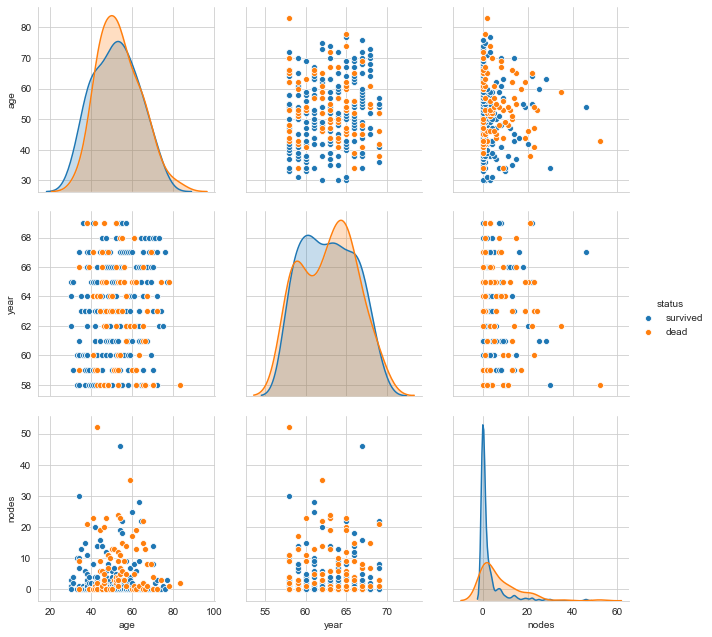

In [12]:
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="status", size=3);
plt.show()

# 1D-SCATTER PLOTS

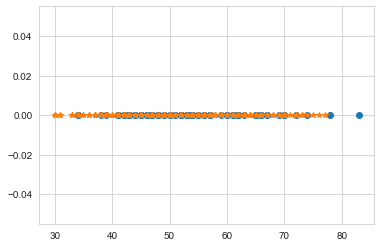

In [13]:
haberman_survived = haberman[haberman['status']=="survived"]
haberman_died = haberman[haberman['status']=="dead"]

plt.plot(haberman_died['age'],np.zeros_like(haberman_died['age']),'o')
plt.plot(haberman_survived['age'],np.zeros_like(haberman_survived['age']),'*')


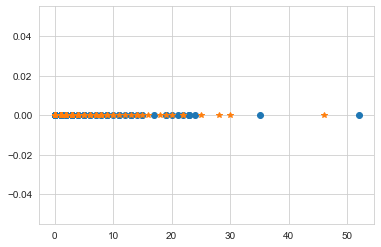

In [14]:
plt.plot(haberman_died['nodes'],np.zeros_like(haberman_died['nodes']),'o')
plt.plot(haberman_survived['nodes'],np.zeros_like(haberman_survived['nodes']),'*')

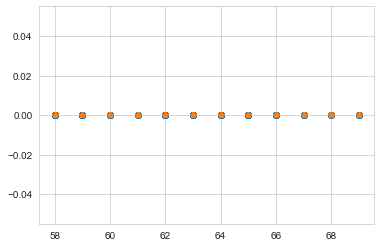

In [15]:
plt.plot(haberman_died['year'],np.zeros_like(haberman_died['year']),'o')
plt.plot(haberman_survived['year'],np.zeros_like(haberman_survived['year']),'*')

# PLOTTING OF HISTOGRAM AND SMOOTH PDF 


E:\anaconda\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


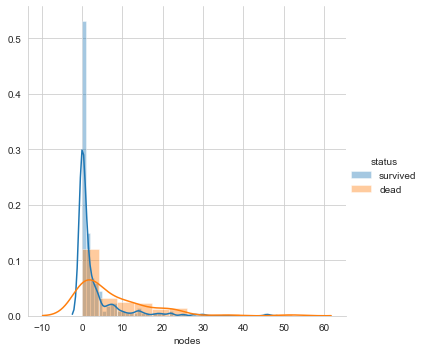

In [16]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.show();



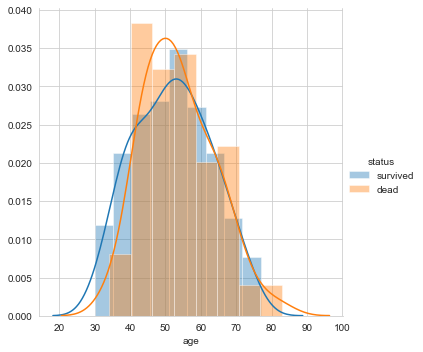

In [17]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();



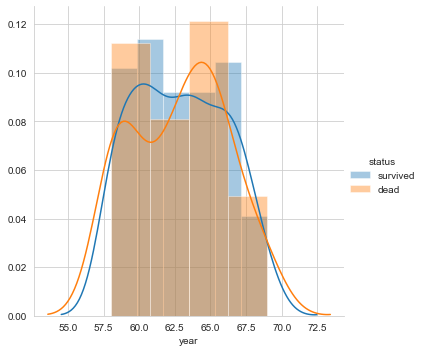

In [18]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.show();



# PLOTTING OF CDF AND PDF

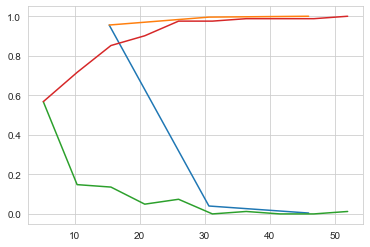

In [19]:
counts,bin_edges = np.histogram(haberman_survived['nodes'],bins=3,density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

# # For Status="no"

counts,bin_edges = np.histogram(haberman_died['nodes'],bins=10,density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

# BOX PLOT AND WHISKERS

In [ ]:
GENERALLY THE HISTOGRAMS CANNOT GIVE US THE 25TH,50TH AND 75TH PERCENTILE 

** BUT THE CDF TELLS US THE PERCENTILES  
** AND ANOTHER STATERGY OF  MERSURING THE PERCENTILES IS USING THE BOX PLOT AND WISKERS
** THE MIDDLE LINE OF THE BOX PLOT GIVES THE 50TH AND STARTING LINE GIVES THE 25 TH AND LAST LINE GIVES THE 100 TH PERCENTILE
** THE WHISKERS IN THE BOX PLOT USUALLY TELLS THE MIN AND MAX GENERALLY IT IS 1.5 TIMES OF IQR(INTER QUARTILE RANGE)

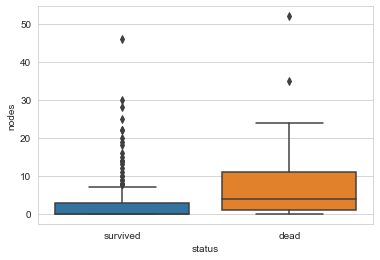

In [22]:
sns.boxplot(x='status',y='nodes',data=haberman)
plt.show()

# VIOLIN PLOTS

In [ ]:
A violin plot combination of  box plots and the probability density function and simplifies them

Denser regions of the data are fatter, and sparser ones thiner in a violin plot

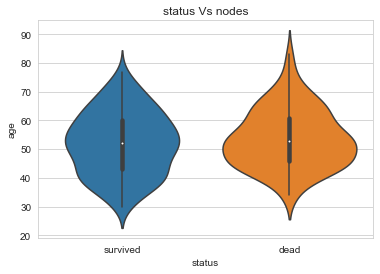

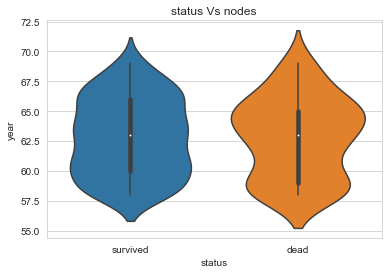

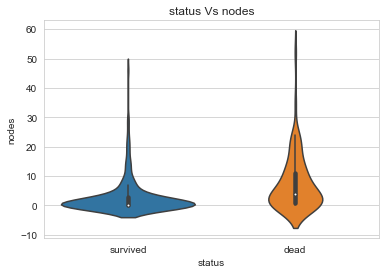

In [27]:
for no_of_features in haberman.columns[:-1]:
    sns.violinplot(x='status',y=no_of_features,data=haberman)
    plt.title("status Vs {0}".format(feat1))
    plt.show()


# JOIN-PLOT OR KDE PLOT

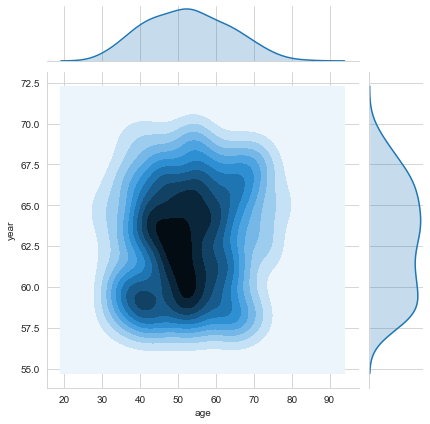

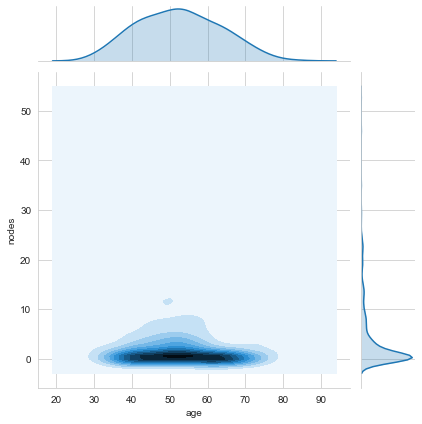

In [29]:
for NO_OF_FEA1 in haberman.columns[:1]:
    for NO_OF_FEA2 in haberman.columns[:-1]:
        if NO_OF_FEA1!=NO_OF_FEA2:
            sns.jointplot(x=NO_OF_FEA1,y=NO_OF_FEA2,data=haberman,kind='kde')
plt.show()


In [ ]:
CONCLUSIONS::
==============
1.There  are total 225 patients who survived 5 years or longer and There are 81 patients who d
ied within 5 years
2.total number of years are 12
3.If we see the plot between age and nodes ,if no. of axillary nodes in between 10-
20 and age between 30-40,we can observe that only 3 of the patients did not s
urvive ,but rest all of them survived.